<a href="https://colab.research.google.com/github/davro76/AirlineDelayFinal/blob/main/FlyDelay_Complet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=5827c4919c1bdc93ccc0f427da1eb667768d1706e4445e918bb027a4bf909316
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


In [3]:
# import required librairies and dependencies
import pandas as pd
from os import listdir
from os import getcwd
import datetime as dt
import plotly.express as px
import plotly.graph_objs as go
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns',100)
%matplotlib inline

In [4]:
# Make Plotly work in our Jupyter Notebook
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [5]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
# read the dataset 
df1 = pd.read_csv('https://raw.githubusercontent.com/davro76/delay/main/large_dataset_sampled.csv')
df1.head(2)

,mkt_ccode,dep_airport,cancel_code,arr_airport,day_week_name,month__name,route,mkt_fl_no,date,dep_delay_time_actual,arr_delay_time_actual,mins_late_delay_code_e_carrier,mins_late_delay_code_f_weather,mins_late_delay_code_g_nas,mins_late_delay_code_h_security,mins_late_delay_code_i_late_arr_flight,delay
0,DL,EWR,0,ATL,Wed,May,EWR-ATL,1189,5/18/22,-4,-20,0,0,0,0,0,0
1,DL,CHO,0,LGA,Sun,Apr,CHO-LGA,5150,4/10/22,-5,-2,0,0,0,0,0,0


In [7]:
df1['delay'].value_counts()

0    12751
1     7243
Name: delay, dtype: int64

In [8]:
# Feature selection for building the ML
features_ML = ['mkt_ccode','mkt_fl_no', 'dep_airport','month__name','day_week_name','delay']
df = df1[features_ML]
df.head(2)

,mkt_ccode,mkt_fl_no,dep_airport,month__name,day_week_name,delay
0,DL,1189,EWR,May,Wed,0
1,DL,5150,CHO,Apr,Sun,0


In [9]:
# Handling categorical features
numer = ['int64']
Cat_feat = df.select_dtypes(exclude=numer) # Categorical features
Cat_feat.head(2)

,mkt_ccode,dep_airport,month__name,day_week_name
0,DL,EWR,May,Wed
1,DL,CHO,Apr,Sun


In [10]:
df['dep_airport'].unique()

array(['EWR', 'CHO', 'DCA', 'MSY', 'SLC', 'JFK', 'MCO', 'ATL', 'BOS',
       'IAD', 'CHA', 'DTW', 'LGA', 'PDX', 'IND', 'TPA', 'CLT', 'ORD',
       'MSP', 'PIT', 'LAS', 'ORF', 'BUF', 'RSW', 'SJC', 'MLU', 'CLE',
       'ABE', 'ONT', 'SEA', 'LAX', 'CVG', 'MKE', 'HSV', 'GPT', 'BIL',
       'GRR', 'ELP', 'SMF', 'GEG', 'GRB', 'BHM', 'SAN', 'PBI', 'OAK',
       'CHS', 'GSP', 'SGU', 'HNL', 'CAE', 'SYR', 'MIA', 'AUS', 'BWI',
       'SAT', 'FCA', 'JAX', 'RIC', 'CMH', 'DFW', 'BNA', 'SFO', 'IAH',
       'MYR', 'TUS', 'OMA', 'DAL', 'BGR', 'MEM', 'SAV', 'GTR', 'TYS',
       'MLB', 'ALB', 'ABY', 'JAN', 'ANC', 'MSN', 'RDU', 'MCI', 'FLL',
       'BRD', 'GTF', 'SJU', 'HIB', 'ROC', 'GSO', 'FSD', 'BIS', 'ECP',
       'MFR', 'TUL', 'MVY', 'PNS', 'STT', 'HOU', 'AEX', 'PSP', 'ATW',
       'CDC', 'ABQ', 'PHL', 'MSO', 'AGS', 'DHN', 'EYW', 'PVD', 'STL',
       'BZN', 'SGF', 'SRQ', 'MDW', 'LAN', 'PIH', 'SNA', 'DEN', 'PHX',
       'PWM', 'BDL', 'SDF', 'SBN', 'LIT', 'LGB', 'MLI', 'IDA', 'VPS',
       'BTM', 'MQT',

In [11]:
# Numerical features
Num_feat = df.select_dtypes(include=numer)
Num_feat = Num_feat.rename(columns={"mkt_fl_no":'fly_no'})
Num_feat.head(1)

,fly_no,delay
0,1189,0


In [12]:
# Using map methode to change abbreviated airline name to numeric airline identification  
airline_mapping = {'DL':1, 'AA':2, 'AS':3, 'B6':4, 'UA':5, 'F9':6, 'G4':7, 'HA':8, 'NK':9, 'WN':10}

# Creating a new column in the Cat_feat DataFrame called 'airline', and populates it with values based on the 'mkt_ccode' column. 
Cat_feat['airline'] = Cat_feat['mkt_ccode'].map(airline_mapping)

# returning an array of the unique values in the 'month' column.
Cat_feat['airline'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
# Using map methode to change abbreviated month name to numeric month  
month_mapping = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,'Oct':10}

# Creating a new column in the Cat_feat DataFrame called 'month', and populates it with values based on the 'month__name' column. 
Cat_feat['month'] = Cat_feat['month__name'].map(month_mapping)

# returning an array of the unique values in the 'month' column.
Cat_feat['month'].unique()

array([5, 4, 2, 7, 6, 3, 8, 9, 1])

In [14]:
# Handling categorical data

# Using map methode to change abbreviated day name to numeric day  
day_mapping = {'Mon':1,'Sun':7, 'Fri':5, 'Tue':2, 'Wed':3, 'Sat':6, 'Thu':4}

# Creating a new column in the Cat_feat DataFrame called 'day', and populates it with values based on the 'day_week_name' column. 
Cat_feat['day'] = Cat_feat['day_week_name'].map(day_mapping)

# returning an array of the unique values in the 'day' column.
Cat_feat['day'].unique()

array([3, 7, 4, 2, 6, 5, 1])

In [19]:
# List of different departure airport codes
airport_codes_list = ['BNA', 'STL', 'IAD', 'ALB', 'MSP', 'DTW', 'SCE', 'SYR', 'ORD',
       'IND', 'LGA', 'XNA', 'JFK', 'MKE', 'ORF', 'ATL', 'HPN', 'ICT',
       'VPS', 'CVG', 'BOS', 'EWR', 'TLH', 'TYS', 'MLI', 'MEM', 'BGR',
       'CHO', 'BTV', 'ABE', 'BTR', 'BQK', 'RDU', 'SHV', 'CHS', 'MYR',
       'AUS', 'ILM', 'LFT', 'SBN', 'FSD', 'LEX', 'DSM', 'DAY', 'GRB',
       'CRW', 'SAV', 'BIS', 'BUF', 'CLT', 'GRR', 'JAN', 'CMH', 'TRI',
       'ROC', 'OAJ', 'ECP', 'MOB', 'CID', 'MIA', 'RIC', 'MSN', 'DLH',
       'EVV', 'AGS', 'PWM', 'MDW', 'PIT', 'DCA', 'ATW', 'LAN', 'CHA',
       'HSV', 'CLE', 'GSO', 'PVD', 'GFK', 'GPT', 'PHL', 'GSP', 'AZO',
       'ABY', 'DHN', 'MBS', 'MOT', 'SGF', 'CAE', 'VLD', 'MDT', 'EYW',
       'GNV', 'AEX', 'SDF', 'MLU', 'TVC', 'BHM', 'RST', 'GTR', 'BWI',
       'MGM', 'CWA', 'CSG', 'AVL', 'BMI', 'FWA', 'ROA', 'FAY', 'ITH',
       'TUL', 'BGM', 'FAR', 'ORH', 'DFW', 'LAX', 'OGG', 'HNL', 'SFO',
       'KOA', 'SJU', 'LIH', 'STT', 'PHX', 'SAN', 'AMA', 'IAH', 'BDL',
       'MCO', 'SNA', 'JAX', 'DEN', 'ELP', 'ABQ', 'MSY', 'FLL', 'RSW',
       'PBI', 'LAS', 'EUG', 'TPA', 'GEG', 'ONT', 'SEA', 'SMF', 'FAT',
       'SRQ', 'JAC', 'SAT', 'MCI', 'SLC', 'SBA', 'RNO', 'PSP', 'PNS',
       'TUS', 'BZN', 'MFE', 'SJC', 'EGE', 'MSO', 'MTJ', 'PDX', 'STX',
       'OKC', 'COS', 'OMA', 'GUC', 'HDN', 'AVP', 'BUR', 'ADQ', 'ANC',
       'BET', 'BRW', 'JNU', 'KTN', 'SIT', 'DAL', 'FAI', 'OTZ', 'ADK',
       'OAK', 'BOI', 'YAK', 'CDV', 'WRG', 'PSG', 'OME', 'SCC', 'BQN',
       'PSE', 'LRD', 'LCH', 'DIK', 'CRP', 'LIT', 'LNK', 'HRL', 'LBB',
       'CPR', 'SAF', 'BRO', 'IDA', 'DRO', 'FLG', 'MAF', 'HLN', 'COD',
       'GJT', 'CLL', 'DAB', 'BIL', 'FCA', 'MLB', 'HOU', 'LGB', 'TTN',
       'ISP', 'SWF', 'ILG', 'SFB', 'FNT', 'USA', 'PGD', 'PIE', 'IAG',
       'PIA', 'AZA', 'STC', 'PSM', 'MFR', 'SCK', 'SMX', 'TOL', 'PBG',
       'GRI', 'RAP', 'BLV', 'RFD', 'HGR', 'ELM', 'PVU', 'SPI', 'PSC',
       'LCK', 'BLI', 'GTF', 'MRY', 'OGD', 'OWB', 'HTS', 'CKB', 'RDM',
       'HHH', 'PQI', 'MHT', 'ITO', 'PPG', 'GCK', 'GGG', 'SPS', 'CMI',
       'ALO', 'FSM', 'LSE', 'LAW', 'ABI', 'TYR', 'GRK', 'DBQ', 'SJT',
       'MHK', 'MQT', 'SWO', 'TXK', 'ACT', 'COU', 'SBP', 'BPT', 'DRT',
       'ROW', 'ACY', 'LBE', 'CAK', 'PHF', 'LYH', 'ERI', 'EWN', 'ASE',
       'YUM', 'BFL', 'ACV', 'SGU', 'SUN', 'LWS', 'ESC', 'INL', 'ABR',
       'APN', 'CIU', 'TWF', 'HIB', 'XWA', 'RHI', 'IMT', 'BTM', 'PLN',
       'BJI', 'BRD', 'CDC', 'EKO', 'PIH', 'OGS', 'DVL', 'JMS', 'MCW',
       'SHD', 'PUB', 'LBL', 'PIB', 'SHR', 'PAH', 'VEL', 'PIR', 'PRC',
       'DDC', 'FOD', 'CGI', 'HYS', 'RKS', 'CNY', 'ATY', 'SLN', 'DEC',
       'CYS', 'ALS', 'VCT', 'RIW', 'SUX', 'MEI', 'GCC', 'JST', 'TBN',
       'EAR', 'RDD', 'BIH', 'STS', 'OTH', 'HOB', 'LWB', 'BFF', 'LBF',
       'CMX', 'JLN', 'EAU', 'MKG', 'LAR', 'PGV', 'ART', 'SBY', 'FLO',
       'YKM', 'ALW', 'PUW', 'PAE', 'EAT', 'DLG', 'AKN', 'GUM', 'SPN',
       'ACK', 'GST', 'HYA', 'MVY', 'BKG', 'WYS'
    
]

# Creating a dictionary called airport_codes_dict where the keys are airport codes and the values are their corresponding unique index numbers
airport_codes_dict = {code: index + 1 for index, code in enumerate(airport_codes_list)}


# Printing the airport_codes_dict
print(airport_codes_dict)
Cat_feat['airport'] = Cat_feat['dep_airport'].map(airport_codes_dict)
Cat_feat.head(2)

{'BNA': 1, 'STL': 2, 'IAD': 3, 'ALB': 4, 'MSP': 5, 'DTW': 6, 'SCE': 7, 'SYR': 8, 'ORD': 9, 'IND': 10, 'LGA': 11, 'XNA': 12, 'JFK': 13, 'MKE': 14, 'ORF': 15, 'ATL': 16, 'HPN': 17, 'ICT': 18, 'VPS': 19, 'CVG': 20, 'BOS': 21, 'EWR': 22, 'TLH': 23, 'TYS': 24, 'MLI': 25, 'MEM': 26, 'BGR': 27, 'CHO': 28, 'BTV': 29, 'ABE': 30, 'BTR': 31, 'BQK': 32, 'RDU': 33, 'SHV': 34, 'CHS': 35, 'MYR': 36, 'AUS': 37, 'ILM': 38, 'LFT': 39, 'SBN': 40, 'FSD': 41, 'LEX': 42, 'DSM': 43, 'DAY': 44, 'GRB': 45, 'CRW': 46, 'SAV': 47, 'BIS': 48, 'BUF': 49, 'CLT': 50, 'GRR': 51, 'JAN': 52, 'CMH': 53, 'TRI': 54, 'ROC': 55, 'OAJ': 56, 'ECP': 57, 'MOB': 58, 'CID': 59, 'MIA': 60, 'RIC': 61, 'MSN': 62, 'DLH': 63, 'EVV': 64, 'AGS': 65, 'PWM': 66, 'MDW': 67, 'PIT': 68, 'DCA': 69, 'ATW': 70, 'LAN': 71, 'CHA': 72, 'HSV': 73, 'CLE': 74, 'GSO': 75, 'PVD': 76, 'GFK': 77, 'GPT': 78, 'PHL': 79, 'GSP': 80, 'AZO': 81, 'ABY': 82, 'DHN': 83, 'MBS': 84, 'MOT': 85, 'SGF': 86, 'CAE': 87, 'VLD': 88, 'MDT': 89, 'EYW': 90, 'GNV': 91, 'AEX': 

,mkt_ccode,dep_airport,month__name,day_week_name,airline,month,day,airport
0,DL,EWR,May,Wed,1,5,3,22
1,DL,CHO,Apr,Sun,1,4,7,28


In [20]:
# Concatenat Cat_feat and Num_feat
df_final = pd.concat([Cat_feat,Num_feat], axis=1)
print(df_final.shape)

# change airport name to airport_code
#df_final.rename(columns = {"mkt_ccode": 'mkt_ccode',	"dep_airport":'airport',	"month__name":'month',	"day_week_name":'day', "mkt_fl_no":'fly_no'})


# Drop categorical columns 
cat_col = ['mkt_ccode','dep_airport','month__name','day_week_name']
df_final = df_final.drop(cat_col,axis=1)
df_final.head(1)

(19994, 10)


,airline,month,day,airport,fly_no,delay
0,1,5,3,22,1189,0


In [21]:
# Using a copy of te dataset to build the ML Model
model_df = df_final.copy()

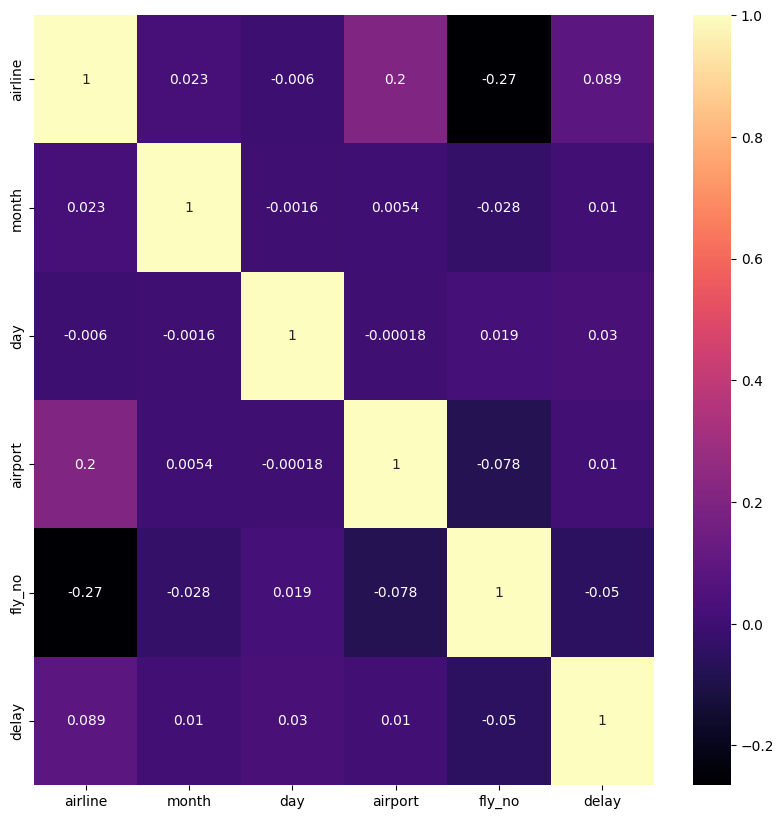

In [22]:
# Feature importance using the correlation technique
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(model_df.corr(), annot=True, cmap='magma');

In [23]:
# Matrice of correlation
model_df.corr()

,airline,month,day,airport,fly_no,delay
airline,1.000000,0.023412,-0.006047,0.202197,-0.265280,0.088700
month,0.023412,1.000000,-0.001629,0.005361,-0.028391,0.010398
day,-0.006047,-0.001629,1.000000,-0.000181,0.019299,0.030230
airport,0.202197,0.005361,-0.000181,1.000000,-0.077773,0.010452
fly_no,-0.265280,-0.028391,0.019299,-0.077773,1.000000,-0.049790
delay,0.088700,0.010398,0.030230,0.010452,-0.049790,1.000000


In [24]:
model_df.columns

Index(['airline', 'month', 'day', 'airport', 'fly_no', 'delay'], dtype='object')

In [28]:
# Dataframe
df_CNN = model_df.copy()

In [29]:
# required librairies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [30]:
df_CNN['delay'].value_counts()

0    12751
1     7243
Name: delay, dtype: int64

In [37]:
# Preprocessing

# Separate features and target from the DataFrame
X = df_CNN[['airline','airport', 'month', 'day', 'fly_no']]
y = df_CNN['delay']

# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print("Before OverSampling count of delay (1): {}".format(sum(y_train==1)))
print("Before OverSampling count of no delay (0): {}".format(sum(y_train==0)))

Before OverSampling count of delay (1): 5794
Before OverSampling count of no delay (0): 10201


In [38]:
X.columns

Index(['airline', 'airport', 'month', 'day', 'fly_no'], dtype='object')

In [32]:
y_train.value_counts()

0    10201
1     5794
Name: delay, dtype: int64

Resampling df dataset

In [33]:
!pip install smote-variants

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.4/407.4 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.7 MB/s eta 0:00:00
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=7f3e3fa050c2d28f2815830f3eae108b036f0bb30c9b7378d872254e015e89f5
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7438 sha256=5753f267103a78328df976b2344468529a69f045ea0fb3d1ad0fab391a29cb37
  Stored in directory: /root/.cache/pip/wheels/59/bd/aa/41ad56fbb723d36e457b5be74feb992cdac2855a6999ba34a1
Successfully built minisom statistics


In [39]:
import smote_variants as sv
import numpy as np

# Instantiating the SMOTE class
oversampler= sv.SMOTE()

# Creating new training set

X_train_us, y_train_us = oversampler.sample(np.array(X_train), np.array(y_train))

# Shape after oversampling

print('After OverSampling, the shape of train_X: {}'.format(X_train_us.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_us.shape))

print("After OverSampling, counts of label delay (1): {}".format(sum(y_train_us==1)))
print("After OverSampling, counts of label no delay (0): {}".format(sum(y_train_us==0)))

2023-05-22 20:08:09,903:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
INFO:smote_variants:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'SMOTE'}")
2023-05-22 20:08:09,910:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-05-22 20:08:09,922:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-05-22 20:08:09,966:INFO:SMOTE: simplex sampl

After OverSampling, the shape of train_X: (20402, 5)
After OverSampling, the shape of train_y: (20402,) 

After OverSampling, counts of label delay (1): 10201
After OverSampling, counts of label no delay (0): 10201


In [54]:
X_train_us

array([[1.00000000e+01, 1.69000000e+02, 8.00000000e+00, 3.00000000e+00,
        2.49900000e+03],
       [2.00000000e+00, 9.00000000e+00, 5.00000000e+00, 2.00000000e+00,
        3.08500000e+03],
       [2.00000000e+00, 1.13000000e+02, 4.00000000e+00, 6.00000000e+00,
        2.11200000e+03],
       ...,
       [5.00000000e+00, 1.30000000e+02, 4.32489427e+00, 4.32489427e+00,
        1.89800000e+03],
       [9.74971114e+00, 1.30000000e+02, 7.05005777e+00, 5.10011555e+00,
        1.47030035e+03],
       [4.57638909e+00, 2.17175927e+01, 2.00000000e+00, 6.29398181e+00,
        3.55212963e+03]])

In [52]:
features_model = X_train_us.shape[1]
features_model

5

Build the Neural Network Model

In [56]:
# number of input features
n_features = features_model
n_features


5

In [57]:
# define the model
airline_model = Sequential()
airline_model.add(Dense(64,activation='relu', kernel_initializer='he_normal',input_shape=(n_features,)))
airline_model.add(Dense(32,activation='relu', kernel_initializer='he_normal'))
airline_model.add(Dense(1,activation='sigmoid'))

# compile the model
airline_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

# fit the model (train it)
airline_model.fit(X_train_us,y_train_us, epochs=150,batch_size=32, verbose = 0)

# evaluate the model
loss, acc = airline_model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# Save the model
airline_model.save('/Users/rodneydavermann/Desktop/StreamlitAirline/airline_model.h5')  # Corrected line


Test Accuracy: 0.626


# Create an App for the Model

In [58]:
import streamlit as st
from tensorflow.keras.models import load_model

def load_model_from_file():
    return load_model('/Users/rodneydavermann/Desktop/StreamlitAirline/airline_model.h5')

NNP = load_model_from_file()


In [60]:
# Define the prediction function
def predict(airline, month, day, mkt_fl_no):

     # if statement for departure airport
    if airport == 'LAX':
        airport = 1
    elif airport == 'SFO':
        airport = 2
    elif airport == 'SEA':
        airport = 3
    elif airport == 'PHX':
        airport = 4
    elif airport == 'DEN':
        airport = 5
    elif airport == 'DFW':
        airport = 6
    elif airport == 'IAH':
        airport = 7
    elif airport == 'MSP':
        airport = 8
    elif airport == 'ORD':
        airport = 9
    elif airport == 'IND':
        airport = 10
    elif airport == 'LGA':
        airport = 11
    elif airport == 'XNA':
        airport = 12
    elif airport == 'JFK':
        airport = 13
    elif airport == 'MKE':
        airport = 14
    elif airport == 'ORF':
        airport = 15
    elif airport == 'ATL':
        airport = 16
    elif airport == 'HPN':
        airport = 17
    elif airport == 'ICT':
        airport = 18
    elif airport == 'VPS':
        airport = 19
    elif airport == 'CVG':
        airport = 20
    elif airport == 'BOS':
        airport = 21
    elif airport == 'EWR':
        airport = 22
    elif airport == 'TLH':
        airport = 23
    elif airport == 'TYS':
        airport = 24
    elif airport == 'MLI':
        airport = 25
    elif airport == 'MEM':
        airport = 26
    elif airport == 'BGR':
        airport = 27
    elif airport == 'CHO':
        airport = 28
    elif airport == 'BTV':
        airport = 29
    elif airport == 'ABE':
        airport = 30
    elif airport == 'BTR':
        airport = 31
    elif airport == 'BQK':
        airport = 32
    elif airport == 'RDU':
        airport = 33
    elif airport == 'SHV':
        airport = 34
    elif airport == 'CHS':
        airport = 35
    elif airport == 'MYR':
        airport = 36
    elif airport == 'AUS':
        airport = 37
    elif airport == 'ILM':
        airport = 38
    elif airport == 'LFT':
        airport = 39
    elif airport == 'SBN':
        airport = 40
    elif airport == 'FSD':
        airport = 41
    elif airport == 'LEX':
        airport = 42
    elif airport == 'DSM':
        airport = 43
    elif airport == 'DAY':
        airport = 44
    elif airport == 'GRB':
        airport = 45
    elif airport == 'CRW':
        airport = 46
    elif airport == 'SAV':
        airport = 47
    elif airport == 'BIS':
        airport = 48
    elif airport == 'BUF':
        airport = 49
    elif airport == 'CLT':
        airport = 50
    elif airport == 'GRR':
        airport = 51
    elif airport == 'JAN':
        airport = 52
    elif airport == 'CMH':
        airport = 53
    elif airport == 'TRI':
        airport = 54
    elif airport == 'ROC':
        airport = 55
    elif airport == 'OAJ':
        airport = 56
    elif airport == 'ECP':
        airport = 57
    elif airport == 'MOB':
        airport = 58
    elif airport == 'CID':
        airport = 59
    elif airport == 'MIA':
        airport = 60
    elif airport == 'RIC':
        airport = 61
    elif airport == 'MSN':
        airport = 62
    elif airport == 'DLH':
        airport = 63
    elif airport == 'EVV':
        airport = 64
    elif airport == 'AGS':
        airport = 65
    elif airport == 'PWM':
        airport = 66
    elif airport == 'MDW':
        airport = 67
    elif airport == 'PIT':
        airport = 68
    elif airport == 'DCA':
        airport = 69
    elif airport == 'ATW':
        airport = 70
    elif airport == 'LAN':
        airport = 71
    elif airport == 'CHA':
        airport = 72
    elif airport == 'HSV':
        airport = 73
    elif airport == 'CLE':
        airport = 74
    elif airport == 'GSO':
        airport = 75
    elif airport == 'PVD':
        airport = 76
    elif airport == 'GFK':
        airport = 77
    elif airport == 'GPT':
        airport = 78
    elif airport == 'PHL':
        airport = 79
    elif airport == 'GSP':
        airport = 80
    elif airport == 'AZO':
        airport = 81
    elif airport == 'ABY':
        airport = 82
    elif airport == 'DHN':
        airport = 83
    elif airport == 'MBS':
        airport = 84
    elif airport == 'MOT':
        airport = 85
    elif airport == 'SGF':
        airport = 86
    elif airport == 'CAE':
        airport = 87
    elif airport == 'VLD':
        airport = 88
    elif airport == 'MDT':
        airport = 89
    elif airport == 'EYW':
        airport = 90
    elif airport == 'GNV':
        airport = 91
    elif airport == 'AEX':
        airport = 92
    elif airport == 'SDF':
        airport = 93
    elif airport == 'MLU':
        airport = 94
    elif airport == 'TVC':
        airport = 95
    elif airport == 'BHM':
        airport = 96
    elif airport == 'RST':
        airport = 97
    elif airport == 'GTR':
        airport = 98
    elif airport == 'BWI':
        airport = 99
    elif airport == 'MGM':
        airport = 100
    elif airport == 'CWA':
        airport = 101
    elif airport == 'CSG':
        airport = 102
    elif airport == 'AVL':
        airport = 103
    elif airport == 'BMI':
        airport = 104
    elif airport == 'FWA':
        airport = 105
    elif airport == 'ROA':
        airport = 106
    elif airport == 'FAY':
        airport = 107
    elif airport == 'ITH':
        airport = 108
    elif airport == 'TUL':
        airport = 109
    elif airport == 'BGM':
        airport = 110
    elif airport == 'FAR':
        airport = 111
    elif airport == 'ORH':
        airport = 112
    elif airport == 'DFW':
        airport = 113
    elif airport == 'LAX':
        airport = 114
    elif airport == 'OGG':
        airport = 115   
    elif airport == 'OGG':
     airport = 115
    elif airport == 'HNL':
        airport = 116
    elif airport == 'SFO':
        airport = 117
    elif airport == 'KOA':
        airport = 118
    elif airport == 'SJU':
        airport = 119
    elif airport == 'LIH':
        airport = 120
    elif airport == 'STT':
        airport = 121
    elif airport == 'PHX':
        airport = 122
    elif airport == 'SAN':
        airport = 123
    elif airport == 'AMA':
        airport = 124
    elif airport == 'IAH':
        airport = 125
    elif airport == 'BDL':
        airport = 126
    elif airport == 'MCO':
        airport = 127
    elif airport == 'SNA':
        airport = 128
    elif airport == 'JAX':
        airport = 129
    elif airport == 'DEN':
        airport = 130
    elif airport == 'ELP':
        airport = 131
    elif airport == 'ABQ':
        airport = 132
    elif airport == 'MSY':
        airport = 133
    elif airport == 'FLL':
        airport = 134
    elif airport == 'RSW':
        airport = 135
    elif airport == 'PBI':
        airport = 136
    elif airport == 'LAS':
        airport = 137
    elif airport == 'EUG':
        airport = 138
    elif airport == 'TPA':
        airport = 139
    elif airport == 'GEG':
        airport = 140
    elif airport == 'ONT':
        airport = 141
    elif airport == 'SEA':
        airport = 142
    elif airport == 'SMF':
        airport = 143
    elif airport == 'FAT':
        airport = 144
    elif airport == 'SRQ':
        airport = 145
    elif airport == 'JAC':
        airport = 146
    elif airport == 'SAT':
        airport = 147
    elif airport == 'MCI':
        airport = 148
    elif airport == 'SLC':
        airport = 149
    elif airport == 'SBA':
        airport = 150
    elif airport == 'RNO':
        airport = 151
    elif airport == 'PSP':
        airport = 152
    elif airport == 'PNS':
        airport = 153
    elif airport == 'TUS':
        airport = 154
    elif airport == 'BZN':
        airport = 155
    elif airport == 'MFE':
        airport = 156
    elif airport == 'SJC':
        airport = 157
    elif airport == 'EGE':
        airport = 158
    elif airport == 'MSO':
        airport = 159
    elif airport == 'MTJ':
        airport = 160
    elif airport == 'PDX':
        airport = 161
    elif airport == 'STX':
        airport = 162
    elif airport == 'OKC':
        airport = 163
    elif airport == 'COS':
        airport = 164
    elif airport == 'OMA':
        airport = 165
    elif airport == 'GUC':
        airport = 166
    elif airport == 'HDN':
        airport = 167
    elif airport == 'AVP':
        airport = 168
    elif airport == 'BUR':
        airport = 169
    elif airport == 'ADQ':
        airport = 170
    elif airport == 'ANC':
        airport = 171
    elif airport == 'BET':
        airport = 172
    elif airport == 'BRW':
        airport
    elif airport == 'BRW':
        airport = 173
    elif airport == 'JNU':
        airport = 174
    elif airport == 'KTN':
        airport = 175
    elif airport == 'SIT':
        airport = 176
    elif airport == 'DAL':
        airport = 177
    elif airport == 'FAI':
        airport = 178
    elif airport == 'OTZ':
        airport = 179
    elif airport == 'ADK':
        airport = 180
    elif airport == 'OAK':
        airport = 181
    elif airport == 'BOI':
        airport = 182
    elif airport == 'YAK':
        airport = 183
    elif airport == 'CDV':
        airport = 184
    elif airport == 'WRG':
        airport = 185
    elif airport == 'PSG':
        airport = 186
    elif airport == 'OME':
        airport = 187
    elif airport == 'SCC':
        airport = 188
    elif airport == 'BQN':
        airport = 189
    elif airport == 'PSE':
        airport = 190
    elif airport == 'LRD':
        airport = 191
    elif airport == 'LCH':
        airport = 192
    elif airport == 'DIK':
        airport = 193
    elif airport == 'CRP':
        airport = 194
    elif airport == 'LIT':
        airport = 195
    elif airport == 'LNK':
        airport = 196
    elif airport == 'HRL':
        airport = 197
    elif airport == 'LBB':
        airport = 198
    elif airport == 'CPR':
        airport = 199
    elif airport == 'SAF':
        airport = 200
    elif airport == 'BRO':
        airport = 201
    elif airport == 'IDA':
        airport = 202
    elif airport == 'DRO':
        airport = 203
    elif airport == 'FLG':
        airport = 204
    elif airport == 'MAF':
        airport = 205
    elif airport == 'HLN':
        airport = 206
    elif airport == 'COD':
        airport = 207
    elif airport == 'GJT':
        airport = 208
    elif airport == 'CLL':
        airport = 209
    elif airport == 'DAB':
        airport = 210
    elif airport == 'BIL':
        airport = 211
    elif airport == 'FCA':
        airport = 212
    elif airport == 'MLB':
        airport = 213
    elif airport == 'HOU':
        airport = 214
    elif airport == 'LGB':
        airport = 215
    elif airport == 'TTN':
        airport = 216
    elif airport == 'ISP':
        airport = 217
    elif airport == 'SWF':
        airport = 218
    elif airport == 'ILG':
        airport = 219
    elif airport == 'SFB':
        airport = 220
    elif airport == 'FNT':
        airport = 221
    elif airport == 'USA':
        airport = 222
    elif airport == 'PGD':
        airport = 223
    elif airport == 'PIE':
        airport = 224
    elif airport == 'IAG':
        airport = 225
    elif airport == 'PIA':
     airport = 226
    elif airport == 'AZA':
        airport = 227
    elif airport == 'STC':
        airport = 228
    elif airport == 'PSM':
        airport = 229
    elif airport == 'MFR':
        airport = 230
    elif airport == 'SCK':
        airport = 231
    elif airport == 'SMX':
        airport = 232
    elif airport == 'TOL':
        airport = 233
    elif airport == 'PBG':
        airport = 234
    elif airport == 'GRI':
        airport = 235
    elif airport == 'RAP':
        airport = 236
    elif airport == 'BLV':
        airport = 237
    elif airport == 'RFD':
        airport = 238
    elif airport == 'HGR':
        airport = 239
    elif airport == 'ELM':
        airport = 240
    elif airport == 'PVU':
        airport = 241
    elif airport == 'SPI':
        airport = 242
    elif airport == 'PSC':
        airport = 243
    elif airport == 'LCK':
        airport = 244
    elif airport == 'BLI':
        airport = 245
    elif airport == 'GTF':
        airport = 246
    elif airport == 'MRY':
        airport = 247
    elif airport == 'OGD':
        airport = 248
    elif airport == 'OWB':
        airport = 249
    elif airport == 'HTS':
        airport = 250
    elif airport == 'CKB':
        airport = 251
    elif airport == 'RDM':
        airport = 252
    elif airport == 'HHH':
        airport = 253
    elif airport == 'PQI':
        airport = 254
    elif airport == 'MHT':
        airport = 255
    elif airport == 'ITO':
        airport = 256
    elif airport == 'PPG':
        airport = 257
    elif airport == 'GCK':
     airport = 258
    elif airport == 'GGG':
        airport = 259
    elif airport == 'SPS':
        airport = 260
    elif airport == 'CMI':
        airport = 261
    elif airport == 'ALO':
        airport = 262
    elif airport == 'FSM':
        airport = 263
    elif airport == 'LSE':
        airport = 264
    elif airport == 'LAW':
        airport = 265
    elif airport == 'ABI':
        airport = 266
    elif airport == 'TYR':
        airport = 267
    elif airport == 'GRK':
        airport = 268
    elif airport == 'DBQ':
        airport = 269
    elif airport == 'SJT':
        airport = 270
    elif airport == 'MHK':
        airport = 271
    elif airport == 'MQT':
        airport = 272
    elif airport == 'SWO':
        airport = 273
    elif airport == 'TXK':
        airport = 274
    elif airport == 'ACT':
        airport = 275
    elif airport == 'COU':
        airport = 276
    elif airport == 'SBP':
        airport = 277
    elif airport == 'BPT':
        airport = 278
    elif airport == 'DRT':
        airport = 279
    elif airport == 'ROW':
        airport = 280
    elif airport == 'ACY':
        airport = 281
    elif airport == 'LBE':
        airport = 282
    elif airport == 'CAK':
        airport = 283
    elif airport == 'PHF':
        airport = 284
    elif airport == 'LYH':
        airport = 285
    elif airport == 'ERI':
        airport = 286
    elif airport == 'EWN':
        airport = 287
    elif airport == 'ASE':
        airport = 288
    elif airport == 'YUM':
        airport = 289
    elif airport == 'BFL':
        airport = 290
    elif airport == 'ACV':
        airport = 291
    elif airport == 'SGU':
        airport = 292
    elif airport == 'SUN':
        airport = 293
    elif airport == 'LWS':
        airport = 294
    elif airport == 'ESC':
        airport = 295
    elif airport == 'INL':
        airport = 296
    elif airport == 'ABR':
        airport = 297
    elif airport == 'APN':
        airport = 298
    elif airport == 'CIU':
        airport = 299
    elif airport == 'TWF':
        airport = 300
    elif airport == 'HIB':
        airport = 301
    elif airport == 'XWA':
        airport = 302
    elif airport == 'RHI':
        airport = 303
    elif airport == 'IMT':
        airport = 304
    elif airport == 'BTM':
        airport = 305
    elif airport == 'PLN':
        airport = 306
    elif airport == 'BJI':
        airport = 307
    elif airport == 'BRD':
        airport = 308
    elif airport == 'CDC':
        airport = 309
    elif airport == 'EKO':
        airport = 310
    elif airport == 'PIH':
        airport = 311
    elif airport == 'OGS':
        airport = 312
    elif airport == 'DVL':
        airport = 313
    elif airport == 'JMS':
        airport = 314
    elif airport == 'MCW':
     airport = 315
    elif airport == 'SHD':
        airport = 316
    elif airport == 'PUB':
        airport = 317
    elif airport == 'LBL':
        airport = 318
    elif airport == 'PIB':
        airport = 319
    elif airport == 'SHR':
        airport = 320
    elif airport == 'PAH':
        airport = 321
    elif airport == 'VEL':
        airport = 322
    elif airport == 'PIR':
        airport = 323
    elif airport == 'PRC':
        airport = 324
    elif airport == 'DDC':
        airport = 325
    elif airport == 'FOD':
        airport = 326
    elif airport == 'CGI':
        airport = 327
    elif airport == 'HYS':
        airport = 328
    elif airport == 'RKS':
        airport = 329
    elif airport == 'CNY':
        airport = 330
    elif airport == 'ATY':
        airport = 331
    elif airport == 'SLN':
        airport = 332
    elif airport == 'DEC':
        airport = 333
    elif airport == 'CYS':
        airport = 334
    elif airport == 'ALS':
        airport = 335
    elif airport == 'VCT':
        airport = 336
    elif airport == 'RIW':
        airport = 337
    elif airport == 'SUX':
        airport = 338
    elif airport == 'MEI':
        airport = 339
    elif airport == 'GCC':
        airport = 340
    elif airport == 'JST':
        airport = 341
    elif airport == 'TBN':
        airport = 342
    elif airport == 'EAR':
        airport = 343
    elif airport == 'RDD':
        airport = 344
    elif airport == 'BIH':
        airport = 345
    elif airport == 'STS':
        airport = 346
    elif airport == 'OTH':
        airport = 347
    elif airport == 'HOB':
        airport = 348
    elif airport == 'LWB':
        airport = 349
    elif airport == 'BFF':
        airport = 350
    elif airport == 'LBF':
        airport = 351
    elif airport == 'CMX':
        airport = 352
    elif airport == 'JLN':
        airport = 353
    elif airport == 'EAU':
        airport = 354
    elif airport == 'MKG':
        airport = 355
    elif airport == 'LAR':
        airport = 356
    elif airport == 'PGV':
        airport = 357
    elif airport == 'ART':
        airport = 358
    elif airport == 'SBY':
        airport = 359
    elif airport == 'FLO':
        airport = 360
    elif airport == 'YKM':
        airport = 361
    elif airport == 'ALW':
        airport = 362
    elif airport == 'PUW':
        airport = 363
    elif airport == 'PAE':
        airport = 364
    elif airport == 'EAT':
        airport = 365
    elif airport == 'DLG':
        airport = 366
    elif airport == 'AKN':
        airport = 367
    elif airport == 'GUM':
        airport = 368
    elif airport == 'SPN':
        airport = 369
    elif airport == 'ACK':
        airport = 370
    elif airport == 'GST':
        airport = 371  
    elif airport == 'GST':
        airport = 371
    elif airport == 'HYA':
        airport = 372
    elif airport == 'MVY':
        airport = 373
    elif airport == 'BKG':
        airport = 374
    elif airport == 'WYS':
        airport = 375

    # if statement for day of week
    if day == 'Mon':
        day = 1
    elif day == 'Tue':
        day = 2
    elif day == 'Wed':
        day = 3
    elif day == 'Thu':
        day = 4
    elif day == 'Fri':
        day = 5
    elif day == 'Sat':
        day = 6
    elif day == 'Sun':
        day = 7

   # if statement for month
    if month == 'Jan':
        month = 1
    elif month == 'Feb':
        month = 2
    elif month == 'Mar':
        month = 3
    elif month == 'Apr':
        month = 4
    elif month == 'May':
        month = 5
    elif month == 'Jun':
        month = 6
    elif month == 'Jul':
        month = 7
    elif month == 'Aug':
        month = 8
    elif month == 'Sep':
        month = 9
    elif month == 'Oct':
        month = 10

  # if statement for airline   
    if airline == 'DL':
        airline = 1
    elif airline == 'AA':
        airline = 2
    elif airline == 'AS':
        airline = 3
    elif airline == 'B6':
        airline = 4
    elif airline == 'UA':
        airline = 5
    elif airline == 'F9':
        airline = 6
    elif airline == 'G4':
        airline = 7
    elif airline == 'HA':
        airline = 8
    elif airline == 'NK':
        airline = 9
    elif airline == 'WN':
        airline_number = 10
    prediction = model.predict(pd.DataFrame([[airline, month, day, fly_no]], columns=['airline', 'month', 'day', 'fly_no']))
    return prediction


st.title('Airline Flight Delay Predictor')
st.image("""https://www.thestreet.com/.image/ar_4:3%2Cc_fill%2Ccs_srgb%2Cq_auto:good%2Cw_1200/MTY4NjUwNDYyNTYzNDExNTkx/why-dominion-diamonds-second-trip-to-the-block-may-be-different.png""")
st.header('Enter the characteristics of the fly:')

Day = st.selectbox('Day of the week:', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun'])
Month = st.selectbox('Month:', ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct'])
airline = st.selectbox('Airline Name:', ['DL', 'AA', 'AS', 'B6', 'UA', 'F9', 'G4', 'HA','NK','WN'])
fly_no = st.number_input('Please, enter the fly number')

if st.button('Predict Fly Delay Time'):
    delay_mn = predict(airline, month, day, fly_no, airport)
    st.success(f'You fly will {delay_mn}')

2023-05-22 20:54:12.394 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]
